In [7]:
!pip install Pillow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

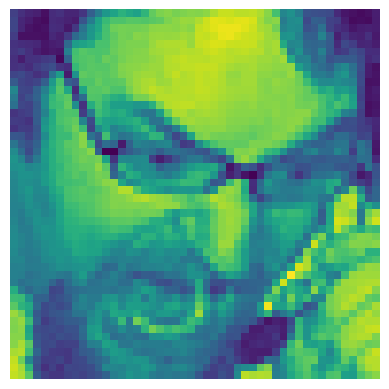

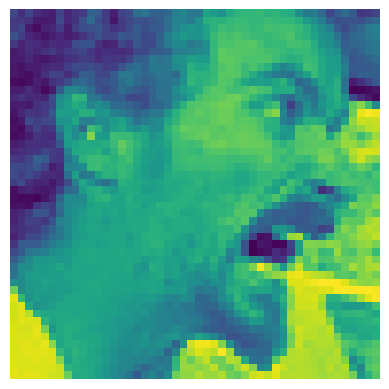

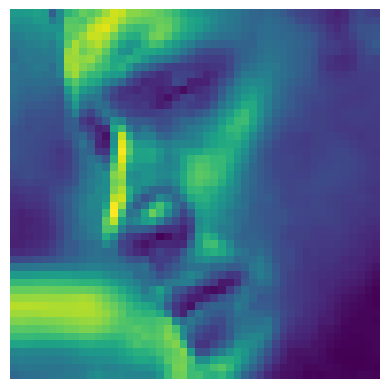

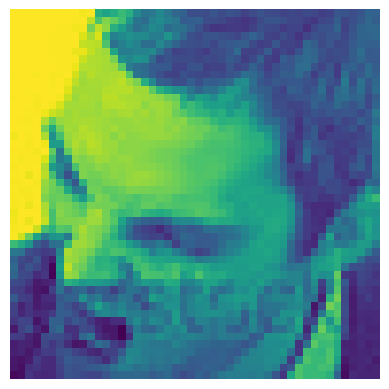

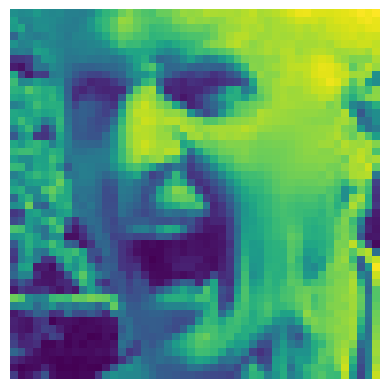

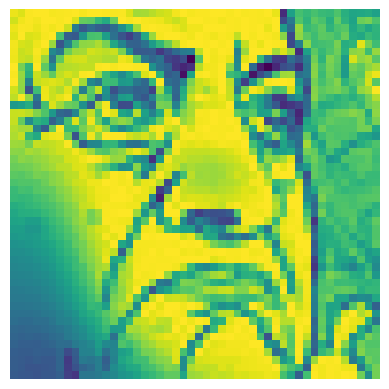

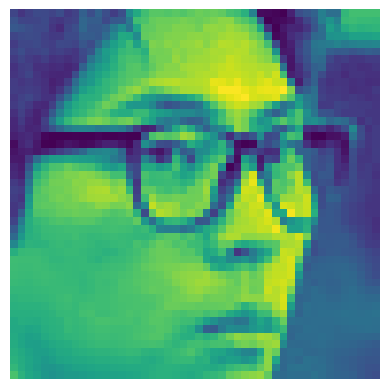

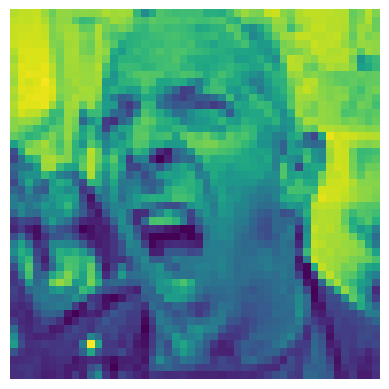

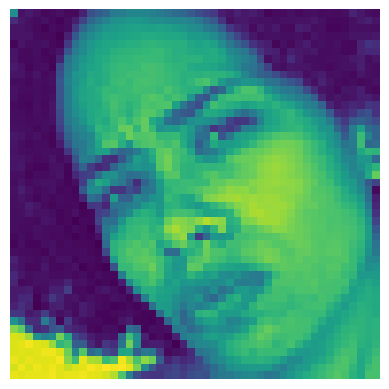

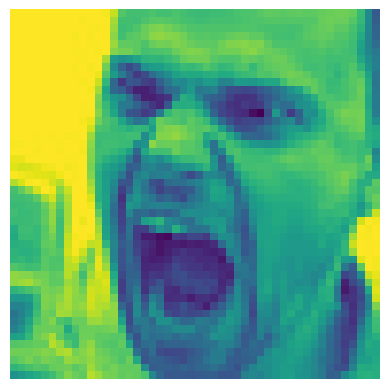

In [54]:
import zipfile
import io
import matplotlib.pyplot as plt
from PIL import Image

# Path to the zip file
zip_file_path = '/content/archive (1).zip'

# Function to display a subset of images from the zip file
def display_subset_of_images(zip_file_path, num_images=10):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Counter to keep track of displayed images
        num_displayed = 0

        # Iterate through the files in the zip file
        for file_name in zip_ref.namelist():
            # Check if the file is an image (assuming it's a .jpg file)
            if file_name.endswith('.jpg'):
                # Read the image file from the zip file
                with zip_ref.open(file_name) as file:
                    img_data = io.BytesIO(file.read())
                    img = Image.open(img_data)

                    # Display the image
                    plt.imshow(img)
                    plt.axis('off')
                    plt.show()

                    # Increment the counter
                    num_displayed += 1

                    # Check if the desired number of images has been displayed
                    if num_displayed >= num_images:
                        break

# Call the function to display a subset of images
display_subset_of_images(zip_file_path, num_images=10)



In [53]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,

        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

In [55]:
from zipfile import ZipFile
from io import BytesIO
from PIL import Image
import os

# Path to the zip file
zip_file_path = '/content/archive (1).zip'

# Directory to extract the files to
extracted_dir = '/content/extracted_images'

# Create the directory if it doesn't exist
os.makedirs(extracted_dir, exist_ok=True)

# Function to extract and process images from the zip file
def extract_images(zip_file_path, extracted_dir):
    with ZipFile(zip_file_path, 'r') as zip_ref:
        for entry in zip_ref.namelist():
            # Check if entry is an image file (you may need to adjust this condition based on your file names)
            if entry.endswith(('.png', '.jpg', '.jpeg')):
                with zip_ref.open(entry) as file:
                    # Read the image data
                    image_data = file.read()
                    # Open image using Pillow
                    image = Image.open(BytesIO(image_data))
                    # Save the image
                    image.save(os.path.join(extracted_dir, os.path.basename(entry)))
                    print(f"Extracted and saved: {entry}")

# Extract images
extract_images(zip_file_path, extracted_dir)


Streaming output truncated to the last 5000 lines.
Extracted and saved: train/sad/Training_65242339.jpg
Extracted and saved: train/sad/Training_65267116.jpg
Extracted and saved: train/sad/Training_65275626.jpg
Extracted and saved: train/sad/Training_6529266.jpg
Extracted and saved: train/sad/Training_65329617.jpg
Extracted and saved: train/sad/Training_65338712.jpg
Extracted and saved: train/sad/Training_65338797.jpg
Extracted and saved: train/sad/Training_65387162.jpg
Extracted and saved: train/sad/Training_65404494.jpg
Extracted and saved: train/sad/Training_65426218.jpg
Extracted and saved: train/sad/Training_65430136.jpg
Extracted and saved: train/sad/Training_65437377.jpg
Extracted and saved: train/sad/Training_6545735.jpg
Extracted and saved: train/sad/Training_65463385.jpg
Extracted and saved: train/sad/Training_65473985.jpg
Extracted and saved: train/sad/Training_65502829.jpg
Extracted and saved: train/sad/Training_65505359.jpg
Extracted and saved: train/sad/Training_65508578.j

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,

        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

In [16]:
from keras.preprocessing.image import ImageDataGenerator
import os
from zipfile import ZipFile

# Path to the zip file
zip_file_path = '/content/archive (1).zip'

# Directory to extract the files to
extracted_dir = '/content/extracted_images'

# Create the directory if it doesn't exist
os.makedirs(extracted_dir, exist_ok=True)

# Extract the zip file
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Define the ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    # Define your data augmentation parameters here if needed
)

# Specify the path to the directory containing the extracted images
train_directory = extracted_dir

# Create the data generator for the training dataset
train_dataset = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(48, 48),  # Resize images to 48x48 pixels
    class_mode='categorical',  # Labels are represented as categorical vectors
    batch_size=64  # Batch size for the data generator
)


Found 35887 images belonging to 2 classes.


In [21]:

# Specify the path to the directory containing the extracted validation images
valid_directory = extracted_dir

# Create the data generator for the validation dataset
valid_dataset = valid_datagen.flow_from_directory(
    directory=valid_directory,
    target_size=(48, 48),  # Resize images to 48x48 pixels
    class_mode='categorical',  # Labels are represented as categorical vectors
    batch_size=64,  # Batch size for the data generator
    subset='validation'  # Generate data for the validation set
)


Found 0 images belonging to 2 classes.


In [19]:
# Change the test_directory path to point to the extracted images directory
test_directory = extracted_dir

# Create the data generator for the test dataset
test_dataset = test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(48, 48),  # Resize images to 48x48 pixels
    class_mode='categorical',  # Labels are represented as categorical vectors
    batch_size=64  # Batch size for the data generator
)


Found 35887 images belonging to 2 classes.


In [27]:
base_model = tf.keras.applications.ResNet50(input_shape=(48,48,3),include_top=False,weights="imagenet")

94765736/94765736 [==============================] - 1s 0us/step


In [28]:
# Freezing Layers

for layer in base_model.layers[:-4]:
    layer.trainable=False

In [29]:
# Building Model

model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))

In [30]:
# Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 dropout (Dropout)           (None, 2, 2, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 batch_normalization (Batch  (None, 8192)              32768     
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 32)                262176    
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                       

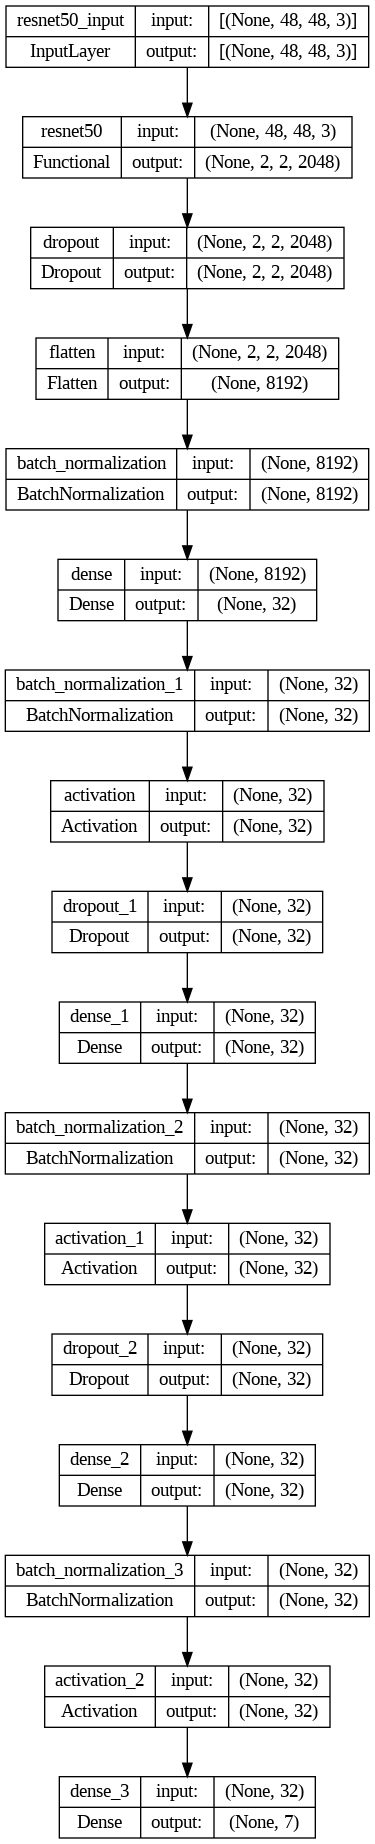

In [31]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [32]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [33]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [34]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,verbose = 1,factor = 0.50, min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

In [35]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [44]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define your model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # Adjust the number of units to 2 for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [45]:
from keras.utils import to_categorical

# Assuming your original generator yields labels as integers (0 and 1)
train_dataset = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(48, 48),
    class_mode='binary',  # Adjust class_mode for binary classification
    batch_size=64
)

# Convert labels to one-hot encoded format
train_dataset = ((images, to_categorical(labels, num_classes=2)) for images, labels in train_dataset)


Found 35887 images belonging to 2 classes.


In [ ]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 60,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/60
359/359 [==============================] - 200s 541ms/step - loss: 1.9926 - accuracy: 0.8535 - precision: 0.1729 - recall: 0.0063 - auc: 0.5778 - f1_score: 0.0120 - val_loss: 1.8343 - val_accuracy: 0.8571 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6371 - val_f1_score: 0.0000e+00
Epoch 2/60
359/359 [==============================] - 158s 440ms/step - loss: 1.8425 - accuracy: 0.8569 - precision: 0.1870 - recall: 4.8729e-04 - auc: 0.6304 - f1_score: 9.5576e-04 - val_loss: 1.8290 - val_accuracy: 0.8571 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6370 - val_f1_score: 0.0000e+00
Epoch 3/60
359/359 [==============================] - 158s 439ms/step - loss: 1.8209 - accuracy: 0.8571 - precision: 0.0923 - recall: 7.9605e-05 - auc: 0.6397 - f1_score: 1.5672e-04 - val_loss: 1.8217 - val_accuracy: 0.8571 - val_precision: 0.4000 - val_recall: 6.9674e-04 - val_auc: 0.6495 - val_f1_score: 0.0014
Epoch 4/60
359/359 [==============================

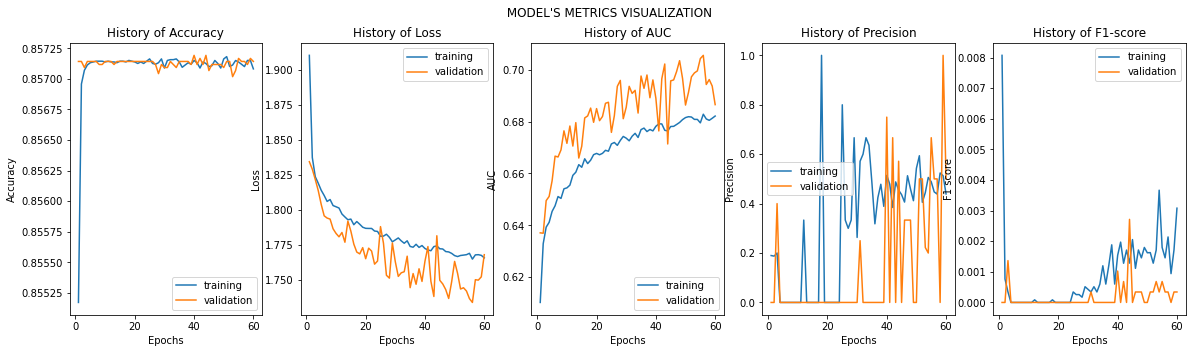

In [ ]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):

    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])

    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])

    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])

    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()


Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score']
              )